<a href="https://www.kaggle.com/code/vanitech8/2025-mba-admission-eda?scriptVersionId=202627757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mba-admission-dataset/MBA.csv


# Exploratory Data Analysis (EDA) on MBA Admission Dataset (2025)
In this notebook, we will explore and analyze an MBA Admission dataset for 2025. The goal is to understand the data through descriptive statistics, visualizations, and correlation analysis. This process will help identify trends, relationships between variables, and important insights that could assist in understanding the admission process.

**Step 1: Importing Necessary Libraries**
We begin by importing libraries such as pandas for data manipulation, numpy for numerical computations, and seaborn/matplotlib for data visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

**Step 2: Loading the MBA Admission Dataset**
We load the MBA Admission dataset using pandas. This dataset likely contains features such as GMAT score, GPA, work experience, age, and whether the candidate was admitted.

In [3]:
df = pd.read_csv('/kaggle/input/mba-admission-dataset/MBA.csv')
print("MBA Admission dataset loaded successfully!!")

MBA Admission dataset loaded successfully!!


**Step 3: Basic Information about the Dataset**
Here we will:

View the first 5 rows of the dataset to understand the structure.
Use .info() to check for missing values and data types.
Use .describe() to compute descriptive statistics (mean, standard deviation, etc.).

In [4]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [6]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


**Step 4: Checking for Missing and Duplicate Data**
We'll check for missing values and duplicate rows to ensure the dataset is clean before moving ahead with analysis.

In [7]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = pd.get_dummies(df, columns = ['gender', 'major', 'race', 'work_industry'])
df

,application_id,international,gpa,gmat,work_exp,admission,gender_Female,gender_Male,major_Business,major_Humanities,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,False,3.30,620.0,3.0,Admit,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,3.28,680.0,5.0,NaN,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2,3,True,3.30,710.0,5.0,Admit,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,False,3.47,690.0,6.0,NaN,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,False,3.35,590.0,5.0,NaN,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6190,False,3.49,640.0,5.0,NaN,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
6190,6191,False,3.18,670.0,4.0,NaN,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6191,6192,True,3.22,680.0,5.0,Admit,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
6192,6193,True,3.36,590.0,5.0,NaN,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False


**Step 5: Handling Missing Data (Optional)**
Depending on the dataset, you can either remove or impute missing values. For example, you can fill missing values for work experience or GPA with the median.

In [10]:
df.dropna(inplace=True)
df['work_experience'] = df['work_exp'].fillna(df['work_exp'].median())

**Step 6: Visualizing Missing Data**
A heatmap will help us visualize where data is missing in the dataset.

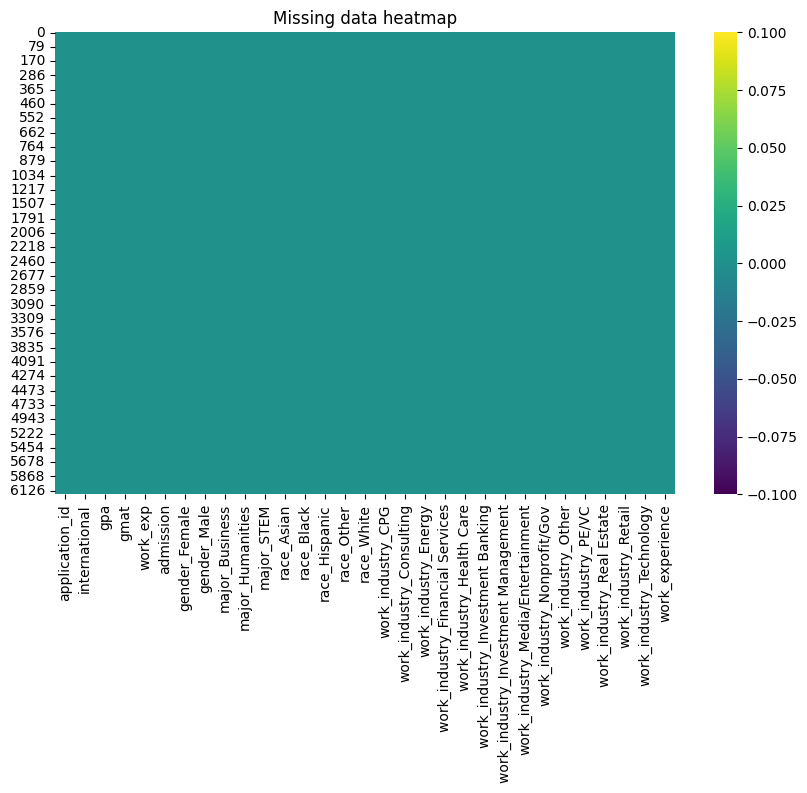

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar='False',cmap='viridis')
plt.title('Missing data heatmap')
plt.show()

**Step 7: Analyzing Categorical Features**
In MBA admission datasets, some features might be categorical, such as gender, work industry, or admitted (yes/no). We will check the unique values for these categorical features.

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in admission:
admission
Admit       900
Waitlist    100
Name: count, dtype: int64


**Step 8: Visualizing Numerical Data Distribution**
Histograms provide a good overview of the distribution of key numerical features, such as GMAT score, GPA, and work experience.

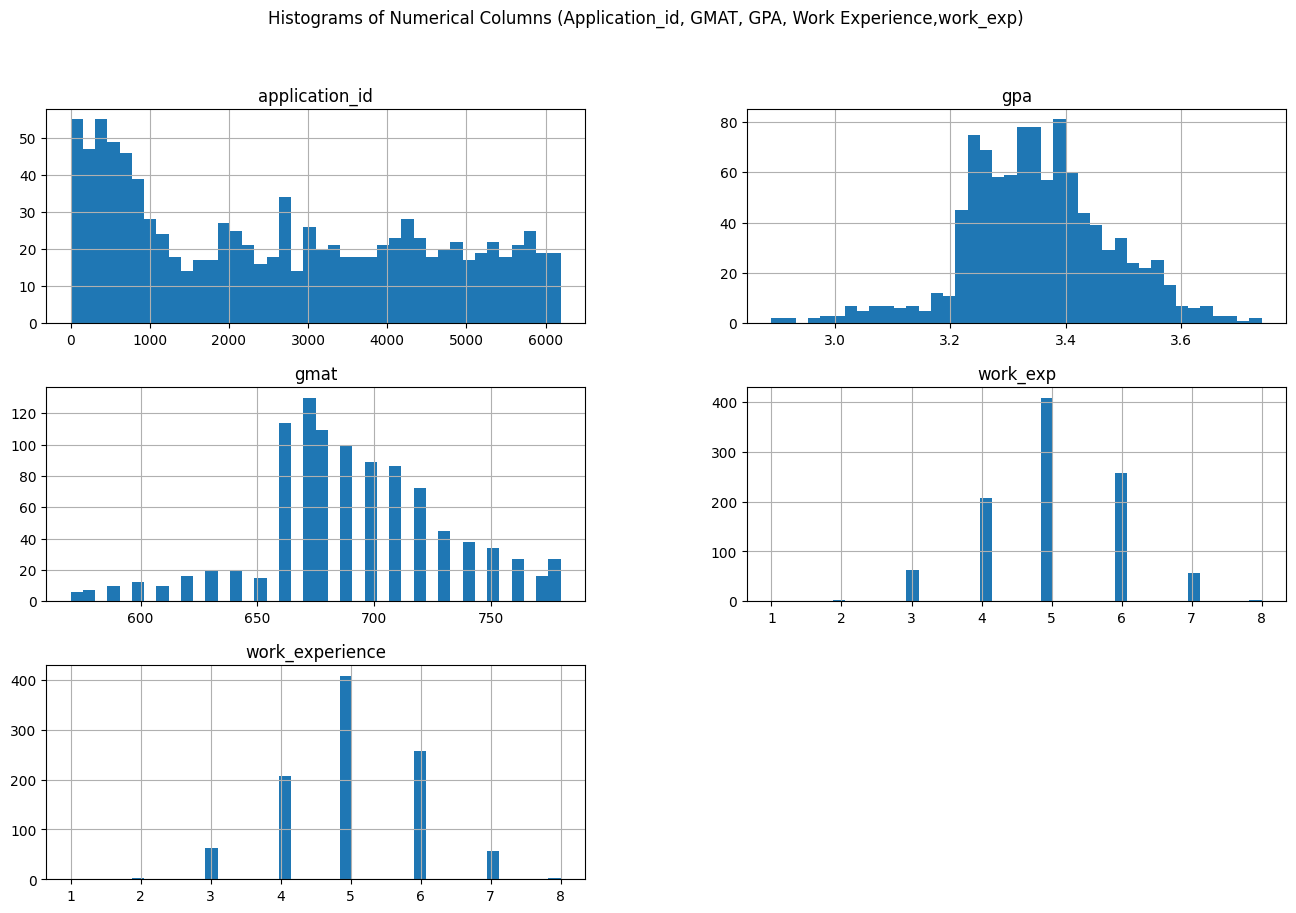

In [13]:
df.hist(figsize=(16,10) ,bins=40)
plt.suptitle('Histograms of Numerical Columns (Application_id, GMAT, GPA, Work Experience,work_exp)')
plt.show()

**Step 9: Correlation Matrix**
We use a correlation matrix to explore how features like GMAT score, GPA, work experience, and age are related. For example, we might find that candidates with higher GMAT scores also have higher GPAs.

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


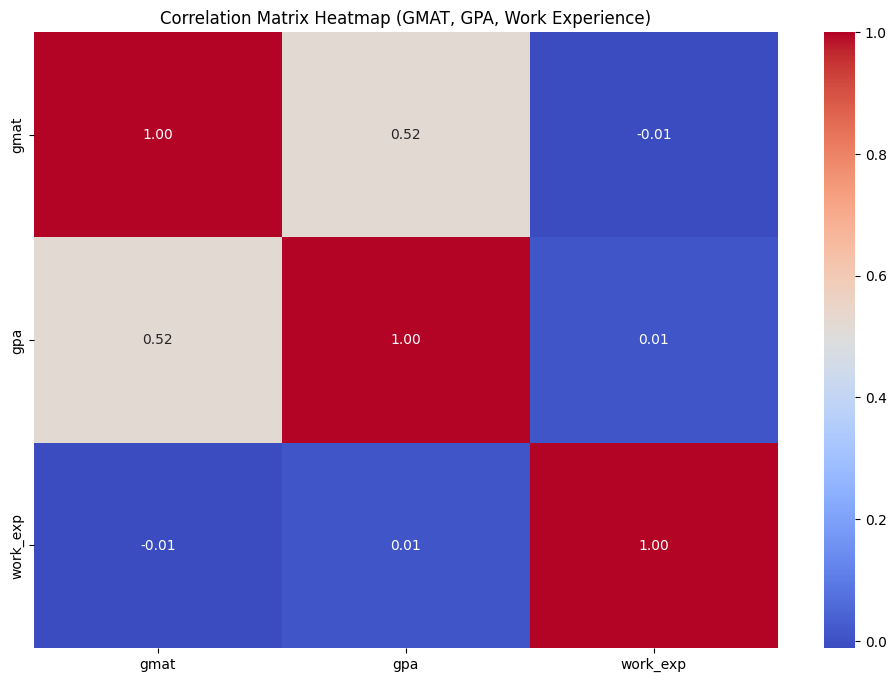

In [15]:
# Select numerical columns for correlation analysis
numerical_columns = ['gmat', 'gpa', 'work_exp']  # Add more columns if necessary

# Generate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (GMAT, GPA, Work Experience)')
plt.show()

**Step 10: Pairplot for Numerical Columns**
Pairplots are useful for visualizing the relationships between pairs of numerical features, such as GMAT score, GPA, work experience, and age.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

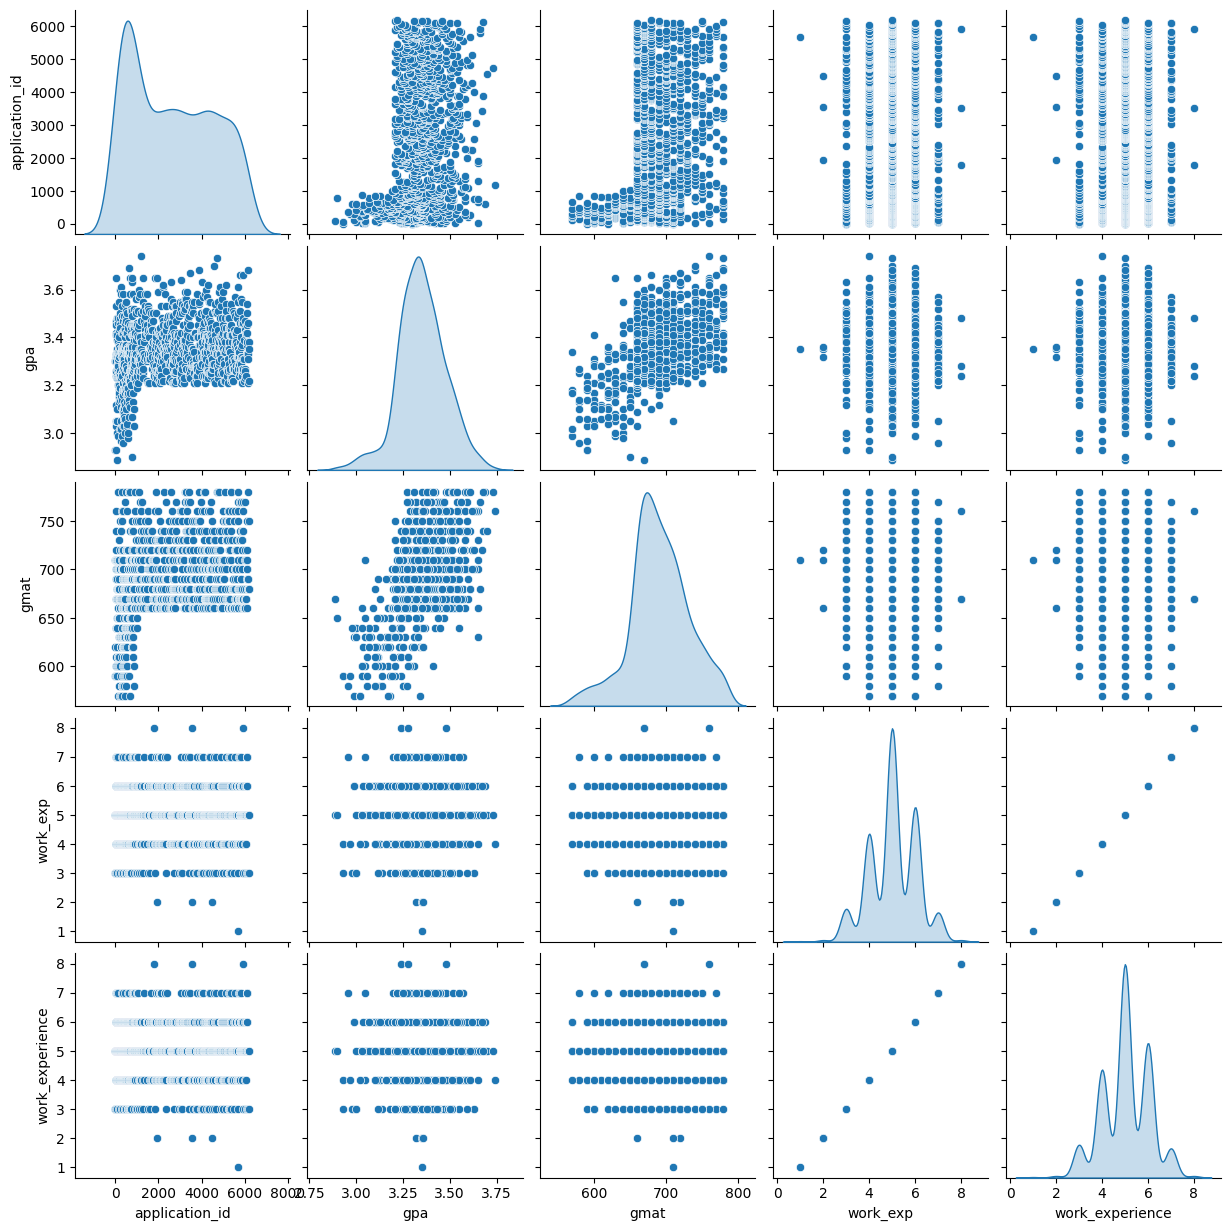

In [16]:
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='kde')
plt.show()

**Step 11: Boxplots for Outlier Detection**
Boxplots help identify outliers in numerical features, such as extremely high or low GMAT scores or work experience.

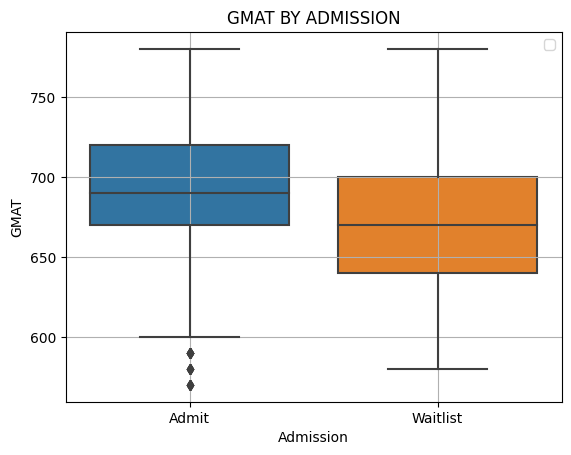

In [17]:
plt.Figure(figsize=(8,6))
sns.boxplot(x = 'admission', y = 'gmat', data = df)

plt.title('GMAT BY ADMISSION')
plt.xlabel('Admission')
plt.ylabel('GMAT')
plt.legend()
plt.grid()


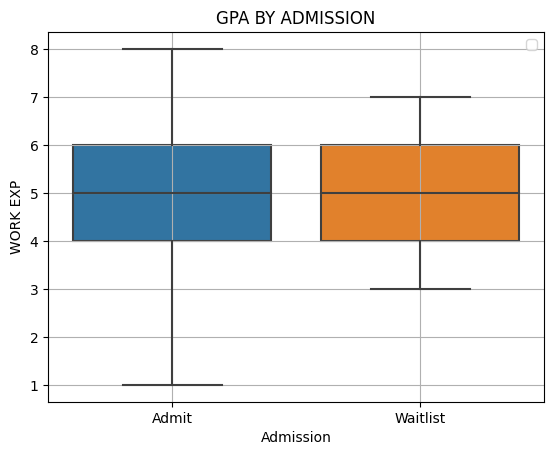

In [18]:
plt.Figure(figsize=(8,6))
sns.boxplot(x = 'admission', y = 'work_exp', data = df)

plt.title('GPA BY ADMISSION')
plt.xlabel('Admission')
plt.ylabel('WORK EXP')
plt.legend()
plt.grid()

**Step 12: Visualizing Categorical Columns**
For categorical features like admitted status or gender, count plots show the frequency distribution, helping us spot imbalances or trends.

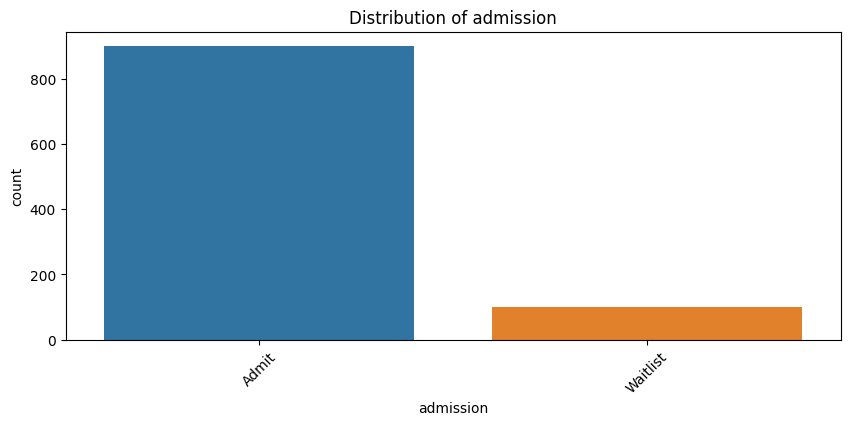

In [19]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Conclusion

In this EDA, we explored the MBA Admission dataset for 2025 using various statistical summaries and visualizations. We uncovered relationships between key features such as GMAT score, GPA, and work experience and visualized how they correlate with admission status. These insights will help in preparing the data for further modeling and predictions.



# AUTHOR Shivani Sharma